In [3]:
%pylab inline
%config Inline.Backend.figure_format = 'retina'

from __future__ import division, print_function
import gwmemory

Populating the interactive namespace from numpy and matplotlib


In [4]:
!pip install lalsuite 

from pycbc import catalog
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.fft import fft

import numpy as np
import scipy as np
import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.



In [5]:
%matplotlib inline

import pylab
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.catalog import Merger
from pycbc.psd import interpolate, inverse_spectrum_truncation

/home/pycbc/pycbc-software/lib/python2.7/site-packages/gwmemory/waveforms.py:594: RuntimeWarning: invalid value encountered in power
  rr = rm * (1 - TT / trr)**(1 / 4)


['plus', 'cross']


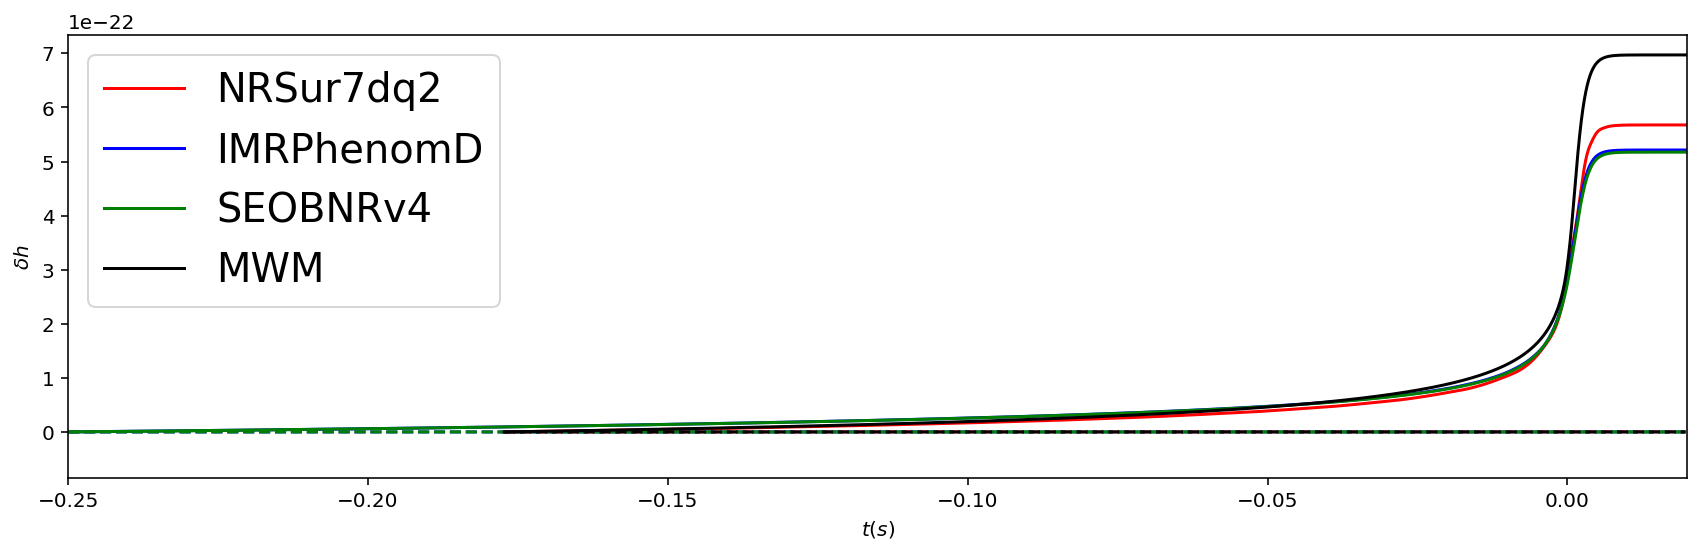

In [6]:
fig = figure(figsize=(12, 4))

q = 1
S1 = [0, 0, 0]
S2 = [0, 0, 0]

colours = ['r', 'b', 'g', 'k']

for ii, model in enumerate(['NRSur7dq2', 'IMRPhenomD', 'SEOBNRv4', 'MWM']):
    h_mem, times = gwmemory.time_domain_memory(q=q, S1=S1, S2=S2, MTot=40., distance=100.,
                                             model=model, inc=np.pi/2, pol=0)

    plot(times, h_mem['plus'] - h_mem['plus'][np.argmin(abs(times+0.25))],
         linestyle='-', color=colours[ii], label=model)
    plot(times, h_mem['cross'] - h_mem['cross'][np.argmin(abs(times+0.25))],
         linestyle='--', color=colours[ii])
        
xlabel('$t (s)$')
ylabel('$\delta h$')
legend(loc='upper left', fontsize=20)

xlim(-0.25, 0.02)
print(h_mem.keys())

tight_layout()
show()
close()

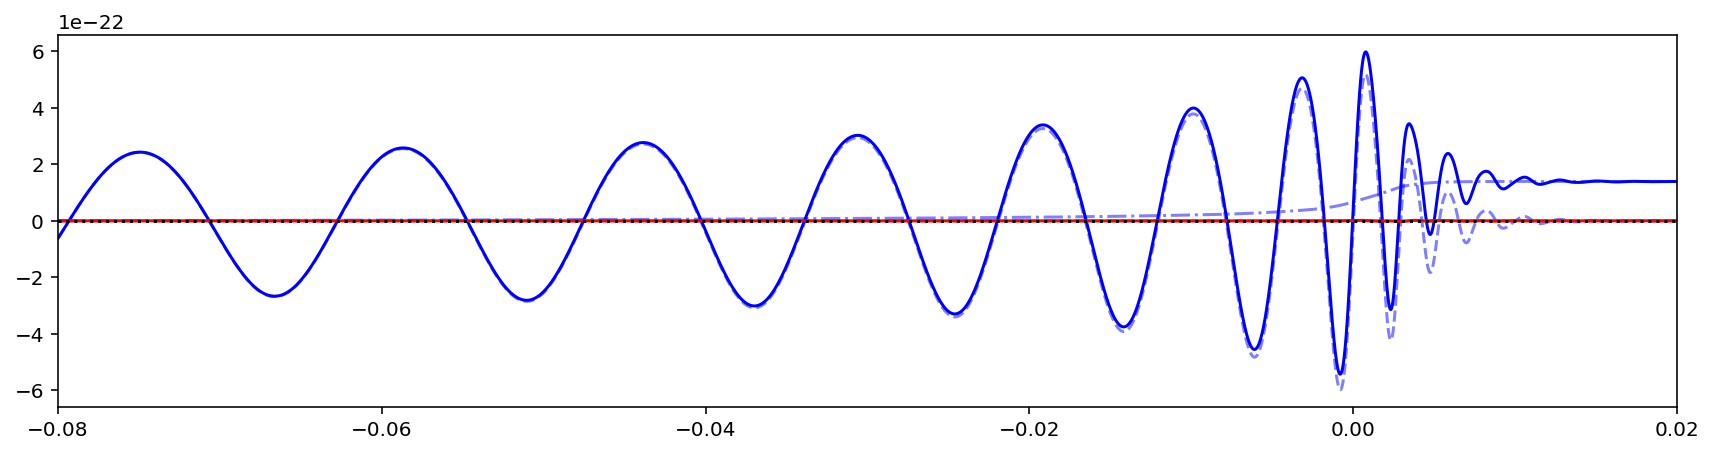

In [7]:
#In order to generate the memory we necessarily generate the time-domain oscillatory waveform
q = 1.
S1 = [0., 0., 0.]
S2 = [0., 0., 0.]

times = np.linspace(-0.08, 0.02, 10001)
surr = gwmemory.waveforms.Surrogate(q=q, S1=S1, S2=S2, MTot=41, distance=400, times=times)



inc = np.pi / 2
pol = 0

oscillatory, times = surr.time_domain_oscillatory(inc=inc, pol=pol)
memory, times = surr.time_domain_memory(inc=inc, pol=pol)

fig = figure(figsize=(12, 6))
fig.add_subplot(2, 1, 1)
plot(times, oscillatory['plus'], linestyle='--', color='b', alpha=0.5)
plot(times, oscillatory['cross'], linestyle='--', color='r', alpha=0.5)
plot(times, memory['plus'], linestyle='-.', color='b', alpha=0.5)
plot(times, memory['cross'], linestyle='-.', color='r', alpha=0.5)
plot(times, oscillatory['plus'] + memory['plus'], color='b')
plot(times, oscillatory['cross'] + memory['cross'], color='r')
axhline(0, linestyle=':', color='k')
xlim(-0.08, 0.02)



tight_layout()
show()
close()

In [8]:
# Generating waveforms for 10 solar mass BBH merger
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30)

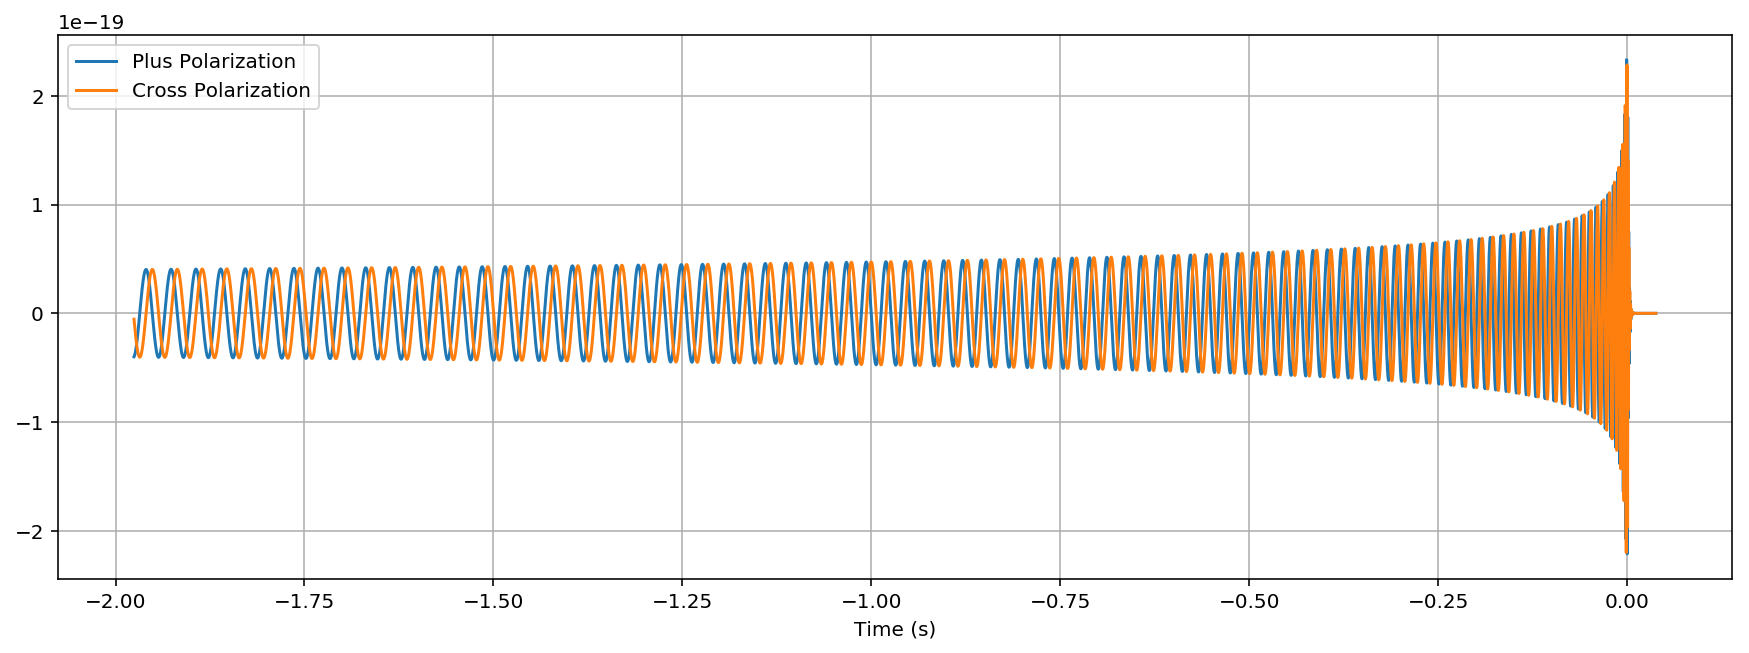

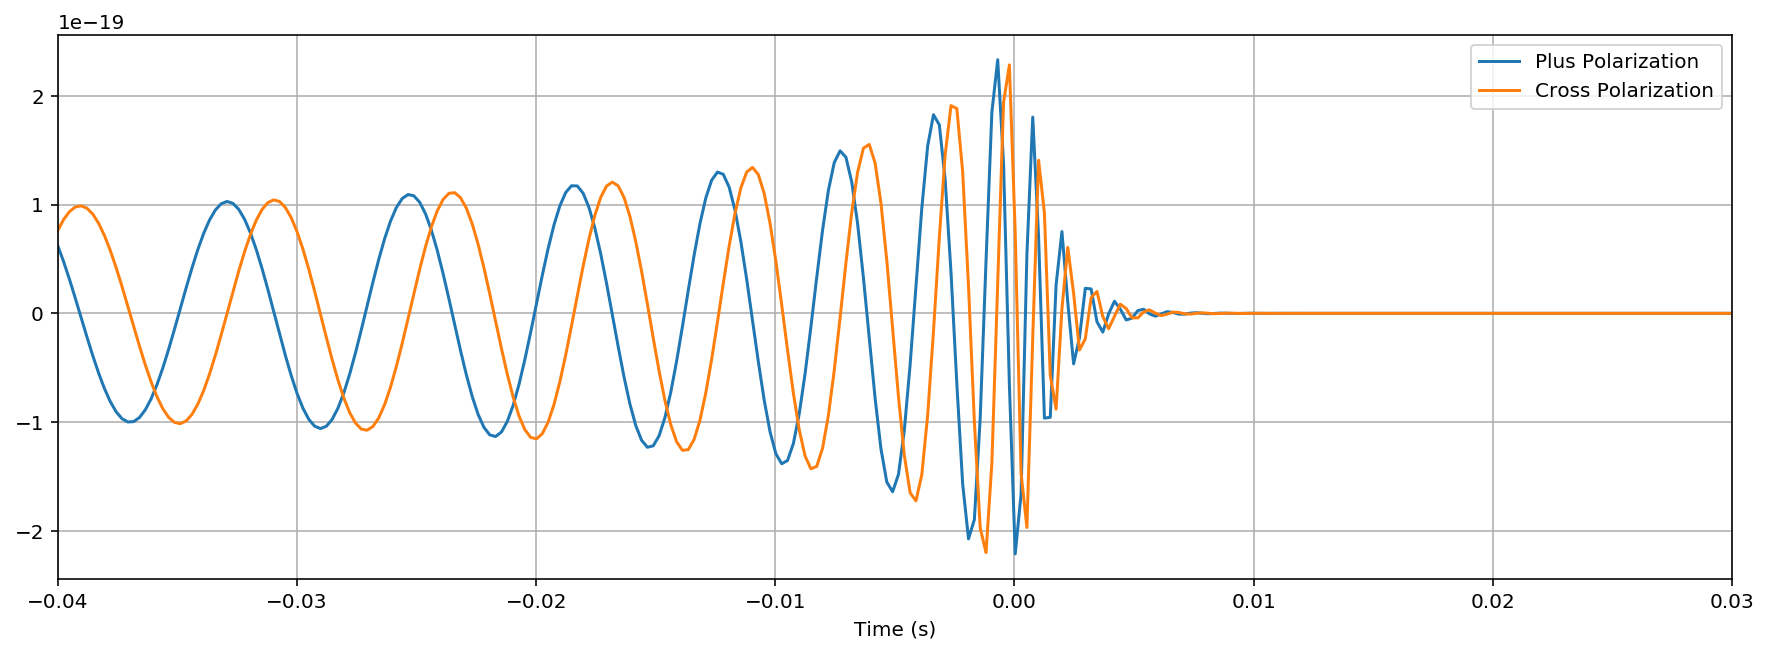

In [9]:
 # Plotting time series 
plt.figure(figsize=(15,5))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()

# Zooming in on merger
plt.figure(figsize=(15,5))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.xlim(-0.04, 0.03)
plt.legend()
plt.grid()

In [10]:
hp_f = hp.to_frequencyseries()
hc_f = hc.to_frequencyseries()

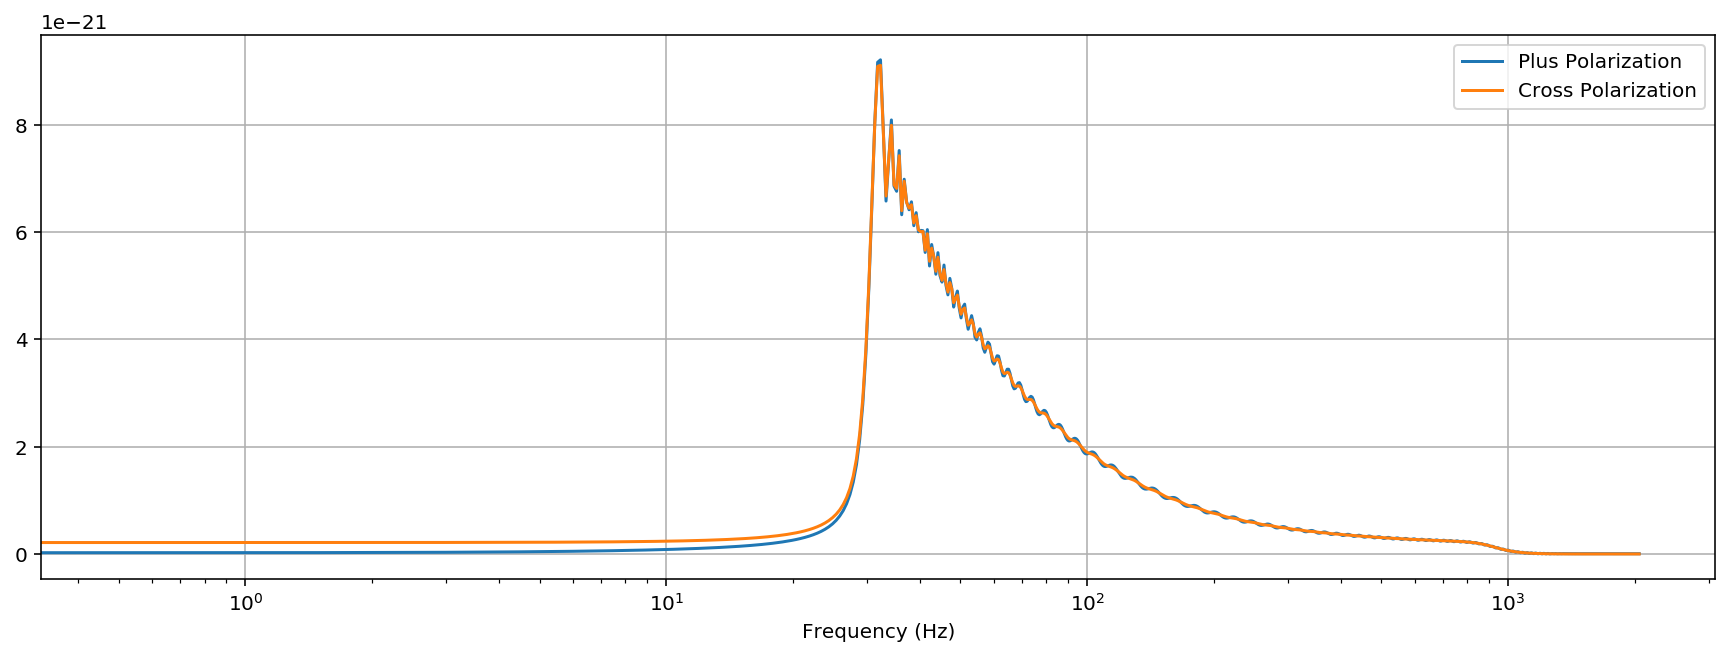

In [11]:
 # Plotting frequency series
plt.figure(figsize=(15,5))
plt.semilogx(hp_f.sample_frequencies, np.absolute(hp_f), label='Plus Polarization')
plt.semilogx(hp_f.sample_frequencies, np.absolute(hc_f), label='Cross Polarization')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid()

In [12]:
 #another attempt at making psd
merger = Merger("GW150914")

# Get the data from the Hanford detector
strain = merger.strain('H1')

# Remove the low frequency content and downsample the data to 2048Hz
strain = resample_to_delta_t(highpass(strain, 15.0), 1.0/2048).crop(2, 2)
print (type (strain))

# Freq. bin size:
df = strain.delta_f
print (df)


# Sample rate:
samp_rate = 4096


# Upper and lower freq. limits
f_lower = 20.
f_upper = 1024


# Making PSD 
psd = strain.psd(4)
psd = interpolate(psd, df)
noise = inverse_spectrum_truncation(psd, 4 * samp_rate)

fs = noise.delta_f * np.arange(noise.data.size)



<class 'pycbc.types.timeseries.TimeSeries'>
0.0357142857143


(10, 2048)

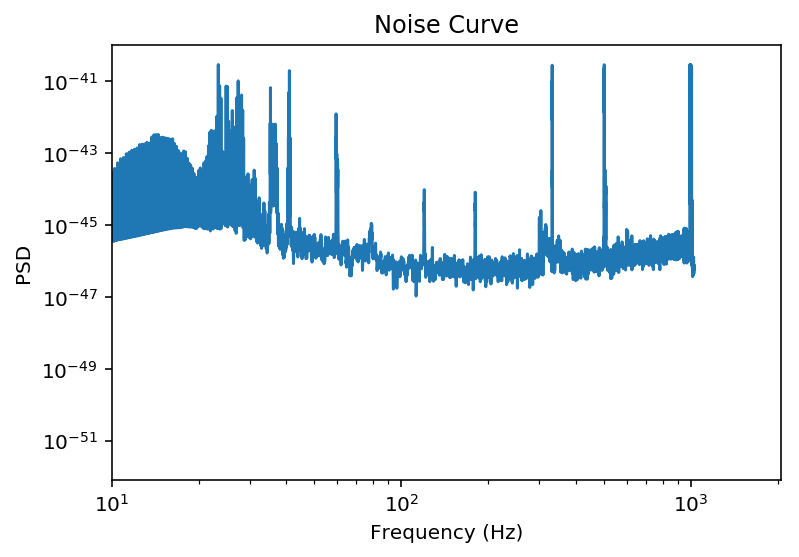

In [13]:
# Plotting noise curve
plt.loglog(fs, noise)
plt.xlim(f_lower, f_upper)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("Noise Curve")
pylab.xlim(10, 2048)





SyntaxError: invalid syntax (<ipython-input-14-907ebbf2ec2e>, line 1)

In [16]:
#Creating asd to be used in likelihood calculations
asd = psd.asd(fftlength=4)
plot = asd.plot()
plot.show()

AttributeError: 'FrequencySeries' object has no attribute 'asd'

In [ ]:

from pycbc import catalog
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.fft import fft

import numpy as np
import scipy as np
import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
times = np.linspace(-0.98, .01, 10000)



In [ ]:

#creating memory waveform 
colours = ['r', 'b', 'g', 'k']

h_mem, frequencies = gwmemory.frequency_domain_memory(q=q, S1=S1, S2=S2, MTot=60., distance=400.,
                                                      model='SEOBNRv4', inc=np.pi/2, pol=0., times=times)


print(frequencies)
plt.figure()
plt.loglog(frequencies, abs(h_mem['plus']), linestyle='-', color='r', label='SEOBNRv4')
#plt.loglog(frequencies, abs(h_mem['cross']), linestyle='--', color='b', label='SEOBNRv4')


    

xlabel('$f$ (Hz)')
ylabel('$\delta h$')

xlim(10, 2048)
#ylim(1e-27, 1e-23)

ax = plt.gca()
ax.grid(True, axis='y')

tight_layout()
show()
close()

In [ ]:

#Creating graph of the signal with the asd, memory, and oscillatory component combined
colours = ['r', 'b', 'g', 'k']

h_mem, frequencies = gwmemory.frequency_domain_memory(q=q, S1=S1, S2=S2, MTot=60., distance=400.,
                                                      model='SEOBNRv4', inc=np.pi/2, pol=0., times=times)


print(frequencies)
plt.figure()
plt.loglog(frequencies, abs(h_mem['plus']), linestyle='-', color='r', label='SEOBNRv4')
#plt.loglog(frequencies, abs(h_mem['cross']), linestyle='--', color='b', label='SEOBNRv4')


plt.semilogx(hp_f.sample_frequencies, np.absolute(hp_f), label='Plus Polarization')
plt.semilogx(hp_f.sample_frequencies, np.absolute(hc_f), label='Cross Polarization')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid()

# Plotting noise curve
plt.xlim(f_lower, f_upper)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("Noise Curve")
pylab.xlim(10, 2048)

#plotting asd
asd = hdata.asd(fftlength=4)
plot = asd.plot()
plot.show()


    

xlabel('$f$ (Hz)')
ylabel('$\delta h$')

xlim(10, 1000)
#ylim(1e-27, 1e-23)

ax = plt.gca()
ax.grid(True, axis='y')

tight_layout()
show()
close()

In [ ]:

#Creating graph of the template with the asd, memory multiplied by lambda, and oscillatory component combined
colours = ['r', 'b', 'g', 'k']

h_mem, frequencies = gwmemory.frequency_domain_memory(q=q, S1=S1, S2=S2, MTot=60., distance=400.,
                                                      model='SEOBNRv4', inc=np.pi/2, pol=0., times=times)

def i in range (1,10,0.01)
    return h_mem['plus']


print(frequencies)
plt.figure()
plt.loglog(frequencies, abs(h_mem['plus']), linestyle='-', color='r', label='SEOBNRv4')
#plt.loglog(frequencies, abs(h_mem['cross']), linestyle='--', color='b', label='SEOBNRv4')


plt.semilogx(hp_f.sample_frequencies, np.absolute(hp_f), label='Plus Polarization')
plt.semilogx(hp_f.sample_frequencies, np.absolute(hc_f), label='Cross Polarization')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid()

# Plotting noise curve
plt.xlim(f_lower, f_upper)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("Noise Curve")
pylab.xlim(10, 2048)

#plotting asd
asd = hdata.asd(fftlength=4)
plot = asd.plot()
plot.show()


    

xlabel('$f$ (Hz)')
ylabel('$\delta h$')

xlim(10, 1000)
#ylim(1e-27, 1e-23)

ax = plt.gca()
ax.grid(True, axis='y')

tight_layout()
show()
close()

In [ ]:
print (len(h_mem['plus']))

In [ ]:
dir(h_mem['plus'])

In [ ]:
print (len(h_mem['cross']))

In [ ]:
# Generating waveforms for 10 solar mass BBH merger
hp1, hc1 = get_td_waveform(approximant="NRSur7dq2",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30)

In [ ]:
 # Plotting time series 
plt.figure(figsize=(15,5))
plt.plot(hp.sample_times, hp1, label='Plus Polarization')
plt.plot(hp.sample_times, hc1, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()

# Zooming in on merger
plt.figure(figsize=(15,5))
plt.plot(hp.sample_times, hp1, label='Plus Polarization')
plt.plot(hp.sample_times, hc1, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.xlim(-0.04, 0.03)
plt.legend()
plt.grid()

In [ ]:
hp1_f = hp.to_frequencyseries()
hc1_f = hc.to_frequencyseries()

In [ ]:
 # Plotting frequency series
plt.figure(figsize=(15,5))
plt.semilogx(hp_f.sample_frequencies, np.absolute(hp1_f), label='Plus Polarization')
plt.semilogx(hp_f.sample_frequencies, np.absolute(hc1_f), label='Cross Polarization')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid()

In [ ]:
times = np.linspace(-0.98, .01, 10000)

colours = ['r', 'b', 'g', 'k']

h_mem, frequencies1 = gwmemory.frequency_domain_memory(q=q, S1=S1, S2=S2, MTot=60., distance=400.,
                                                      model='NRSur7dq2', inc=np.pi/2, pol=0., times=times)

print(frequencies1)
plt.figure()
plt.loglog(frequencies, abs(h_mem['plus']), linestyle='-', color='r', label=model)
#plt.loglog(frequencies, abs(h_mem['cross']), linestyle='--', color='r')

plt.semilogx(hp1_f.sample_frequencies, np.absolute(hp1_f), label='Plus Polarization')
plt.semilogx(hp1_f.sample_frequencies, np.absolute(hc1_f), label='Cross Polarization')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid()
    
xlabel('$f$ (Hz)')
ylabel('$\delta h$')

xlim(10, 2048)
ylim(1e-27, 1e-23)

ax = plt.gca()
ax.grid(True, axis='y')

tight_layout()
show()
close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from pycbc.filter import match


In [ ]:
#Trimming the data to the same length
tlen = max(len(h_mem['plus']), len(psd))
h_mem['plus'].resize(tlen)
psd.resize(tlen)

In [ ]:
#df = h_mem['plus'].delta_f 

#noise_interp = interpolate(noise,df)
#noise_interp_trimmed = noise_interp[:len(h_mem['plus'])]

In [ ]:
pip install python-resize-image

In [ ]:
h_mem['plus'].resize(len(psd[ifo]))

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#data = np.arange(3000).reshape((100,30))
#plt.imshow(data)


In [ ]:
# df = h_mem2.delta_f 

# noise_interp = interpolate(noise,df)
# noise_interp_trimmed = noise_interp[len(h_mem2)]

In [ ]:
 #the noise weighted inner product
    # Function to calculate the noise weighted inner product of two vectors
# a and b (FFTs) with noise vector Sn (PSD); df = freq. bin size.a, b, and Sn must be same length
#def InnerProduct(a, b, Sn, df):
    
    
    
  #  b_conj = np.conjugate(b)
    
   # integrand = []
    
    #   intgrnd = a[i]*b_conj[i]/Sn[i]
     #   integrand.append(intgrnd)
            
   # result_complex = 4*np.sum(integrand)*df
    
    #result = np.real(result_complex)
    
   # return result

#InnerProductAnswer = InnerProduct(a, b, asd, df)
#print(InnerProductAnswer)"""

In [ ]:
 # Function to calculate the likelihood of data given parameters theta that
# generate strain h_theta (frequency series) with noise Sn (ASD); df = freq. bin size
#  h_theta, data, and Sn (ASD) must all be same length

def Log Likelihood(data, h_theta, Sn, df):
    
    h_minus_d = h_theta - data
    
    term = (-1.0/2)*InnerProduct(h_minus_d, h_minus_d, Sn, df)
    
    result = (term)

    return result

LogLikelihoodAnswer = Log Likelihood(data, h_theta, Sn, df)
print (LogLikelihoodAnswer)

In [ ]:
for i in range (-10,10,0.01)
 return i*memory

Memory scale = i*memory

In [ ]:
import pylab
import numpy

x = numpy.linspace(-10,10,0.01) 
y = numpy.(-1.0/2)*InnerProduct(h_minus_d, h_minus_d, Sn, df) 
pylab.xlim(-10, 10, 0.01)
pylab.xlabel('Lambda')
pylab.ylim(0, 10)
pylab.ylabel('Likelihood')

pylab.plot(x,y) 
pylab.show() 